## Compute Average Image

In [1]:
import os, numpy, PIL
from PIL import Image
import cv2

path = "./heatmaps/dog/"
# Access all PNG files in directory
allfiles=os.listdir(path)
print(allfiles)
# imlist=[filename for filename in allfiles if filename[-4:] in [".png",".PNG"]]
imlist = allfiles
print(imlist[0])

# Assuming all images are the same size, get dimensions of first image
imgpath = path + imlist[0]

w,h=Image.open(imgpath).size
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    src = cv2.imread(path+im)
#     imarr=numpy.array(Image.open(path+im),dtype=numpy.float)
    img=cv2.cvtColor(src, cv2.COLOR_BGRA2RGB);
    arr=arr+img/N

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()

['dog.png', 'dog-stylized-noise.png', 'Average.png', 'dog-stylized-trucks.png', 'dog-stylized-tiger.png', 'dog-stylized-blur.png', 'dog-stylized-zebra.png']
dog.png


## Compute Image Similarity

In [2]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [21]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s, img_s = ssim(imageA, imageB, multichannel=True, full=True)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 3, 1)
	plt.imshow(imageA)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 3, 2)
	plt.imshow(imageB)
	plt.axis("off")
	
	ax = fig.add_subplot(1, 3, 3)
	plt.imshow(img_s)
	plt.axis("off")
	# show the images
	plt.show()

In [22]:
original = cv2.imread(path+"dog.png")
average = cv2.imread(path+"Average.png")
tiger = cv2.imread(path+"dog-stylized-tiger.png")
zebra = cv2.imread(path+"dog-stylized-zebra.png")
trucks = cv2.imread(path+"dog-stylized-trucks.png")

original = cv2.cvtColor(original, cv2.COLOR_BGRA2RGB)
average = cv2.cvtColor(average, cv2.COLOR_BGRA2RGB)
tiger = cv2.cvtColor(tiger, cv2.COLOR_BGRA2RGB)
zebra = cv2.cvtColor(zebra, cv2.COLOR_BGRA2RGB)
trucks = cv2.cvtColor(trucks, cv2.COLOR_BGRA2RGB)

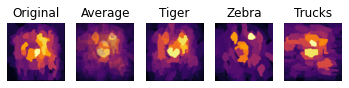

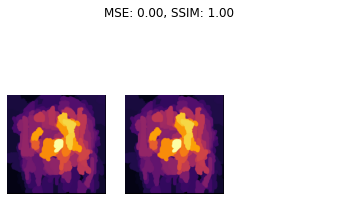

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


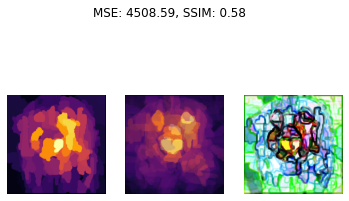

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


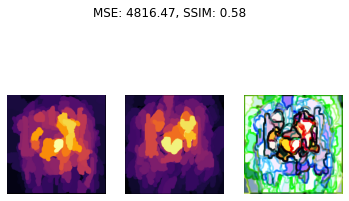

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


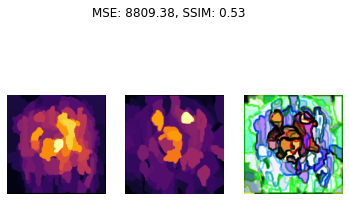

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


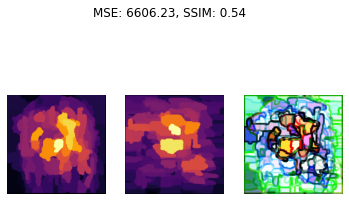

In [23]:
fig = plt.figure("Images")
images = ("Original", original), ("Average", average), ("Tiger", tiger), ("Zebra", zebra), ("Trucks", trucks)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 5, i + 1)
	ax.set_title(name)
	plt.imshow(image)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, average, "Original vs. Average")
compare_images(original, tiger, "Original vs. Style Tiger")
compare_images(original, zebra, "Original vs. Style Zebra")
compare_images(original, trucks, "Original vs. Style Trucks")

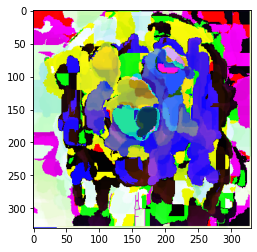

In [194]:
sub_img = original - average
plt.imshow(sub_img)

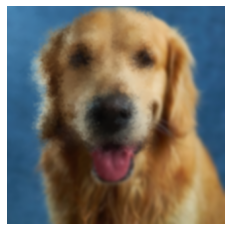

In [54]:
from imagenet_c import corrupt

path="./assets/shapes/"
dog = cv2.imread(path+"dog.jpg")
dog = cv2.cvtColor(dog, cv2.COLOR_BGRA2RGB)

width = 330
height = 330 # keep original height
dim = (width, height)
 
# resize image
resized = cv2.resize(dog, dim, interpolation = cv2.INTER_AREA)

blur = corrupt(resized, 5, 'glass_blur', 4)
blur = cv2.cvtColor(blur, cv2.COLOR_BGRA2BGR)

plt.axis("off")
plt.imshow(blur)

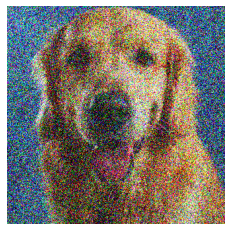

In [28]:
from imagenet_c import corrupt

path="./assets/shapes/"
dog = cv2.imread(path+"dog.jpg")
dog = cv2.cvtColor(dog, cv2.COLOR_BGRA2RGB)

width = 330
height = 330 # keep original height
dim = (width, height)
 
# resize image
resized = cv2.resize(dog, dim, interpolation = cv2.INTER_AREA)

noise = corrupt(resized, 5, 'gaussian_noise', 4)
noise = cv2.cvtColor(noise, cv2.COLOR_BGRA2BGR)

plt.axis("off")
plt.imshow(noise)

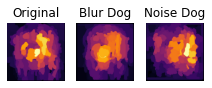

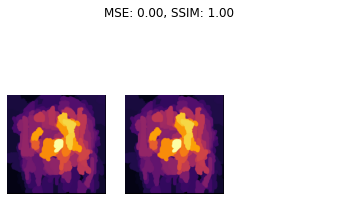

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


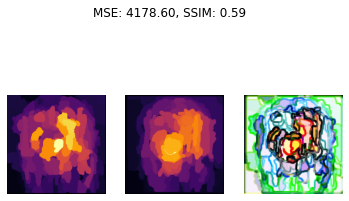

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


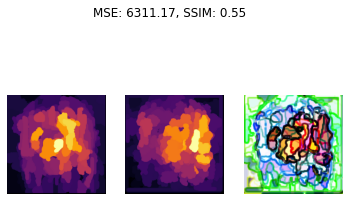

In [46]:
path = "./heatmaps/dog/"

blur_dog = cv2.imread(path+"dog-stylized-blur.png")
noise_dog = cv2.imread(path+"dog-stylized-noise.png")

blur_dog = cv2.cvtColor(blur_dog, cv2.COLOR_BGRA2RGB)
noise_dog = cv2.cvtColor(noise_dog, cv2.COLOR_BGRA2RGB)

fig = plt.figure("Images")
images = ("Original", original), ("Blur Dog", blur_dog), ("Noise Dog", noise_dog)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 5, i + 1)
	ax.set_title(name)
	plt.imshow(image)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, blur_dog, "Original vs. Blur Dog")
compare_images(original, noise_dog, "Original vs. Noise Dog")

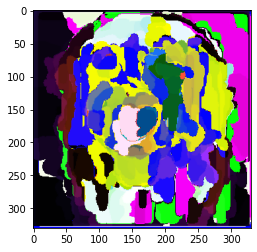

In [56]:
plt.imshow((original - blur_dog))

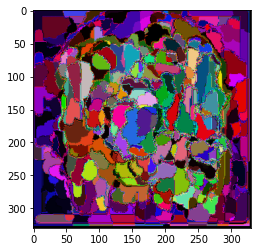

In [152]:
plt.imshow((original - noise_dog)**2)

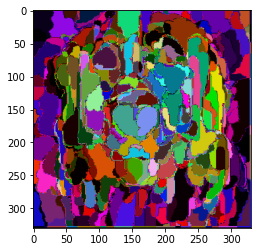

In [138]:
plt.imshow((original - tiger)**2)

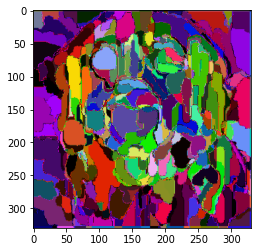

In [139]:
plt.imshow((original - zebra)**2)

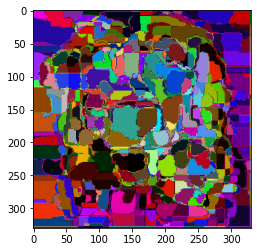

In [140]:
plt.imshow((original - trucks)**2)

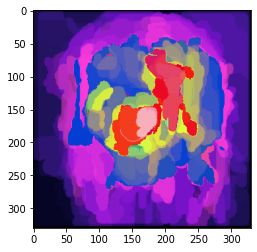

In [143]:
plt.imshow((original + blur_dog)/255)

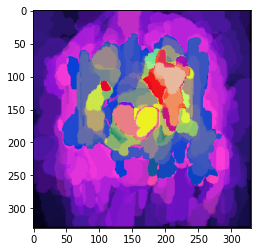

In [144]:
plt.imshow((original + tiger)/255)

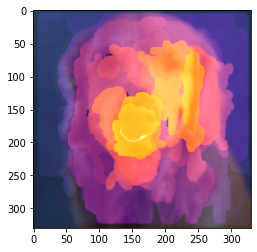

In [66]:
added_image = cv2.addWeighted(blur,0.4,blur_dog,1,10)
plt.imshow(added_image)

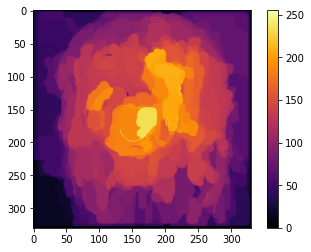

In [109]:
added_image = cv2.addWeighted(original,1,blur_dog,1,0)
inferno_image = cv2.applyColorMap(added_image, cv2.COLORMAP_INFERNO)
inferno_image = cv2.cvtColor(inferno_image, cv2.COLOR_BGRA2RGB)
plt.imshow(inferno_image, cmap='inferno')
plt.colorbar()

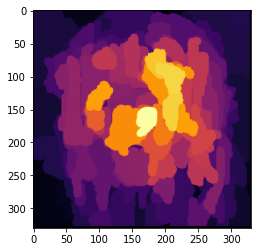

In [69]:
plt.imshow(original)

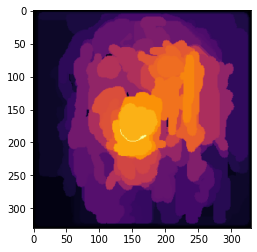

In [110]:
plt.imshow(blur_dog)